In [12]:
import matplotlib.pyplot as plt

# SVC
scikit-learn 이 제공하는 Support Vector Classification class  

## SVC's Parameters
- **C** : Regularization(규제) 강도를 결정하는 Parameter. C 값이 작으면 더 많은 error 수용. (C 값이 커지면 모델이 복잡해진다)
- **kernel** : 커널트릭을 설정하는 Parameter. default='rbf', 'linear', 'poly', 'rbf', 'sigmoid' 선택가능
- **gamma** : 커널 폭 제어하는 Parameter. 하나의 훈련 데이터가 미치는 영향의 범위 결정. gamma 값이 클수록 모델이 복잡해진다. default='auto'. 'rbf', 'poly', 'sigmoid' 커널에서 사용한다

# 위스콘신 유방암 데이터셋 적용

In [29]:
print(X_train.shape, y_train.shape)

(426, 30) (426,)


In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

C:\Users\MAIN\Anaconda3\envs\kaggle\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


In [10]:
print(f'Accuracy on training set : {svc.score(X_train, y_train):.2f}')
print(f'Accuracy on test set: {svc.score(X_test, y_test):2f}') # overfitting 확인

Accuracy on training set : 1.00
Accuracy on test set: 0.629371


Text(0.5, 1.0, 'feature range of dataset')

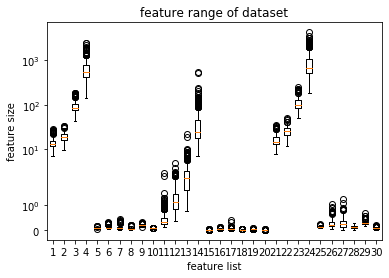

In [21]:
plt.boxplot(X_train)
plt.yscale('symlog')
plt.xlabel('feature list')
plt.ylabel('feature size')
plt.title('feature range of dataset')

In [22]:
# Training set의 특성별 최소값 계산
min_on_training = X_train.min(axis=0)
# Training Set의 특성별 (최대값 - 최소값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# MinMaxScale 적용
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature \n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature \n{}".format(X_train_scaled.max(axis=0)))

Minimum for each feature 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [24]:
# Test set에도 같은 스케일 작업을 적용
# 대신, Training set에서 계산한 최소값(min)과 범위를 사용
X_test_scaled = (X_test - min_on_training) / range_on_training

In [25]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

C:\Users\MAIN\Anaconda3\envs\kaggle\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


In [27]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


C:\Users\MAIN\Anaconda3\envs\kaggle\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
